In [1]:
from config import CONFIG
from utils import series_to_supervised

CONFIG

{'columns': ['Close', 'Volume', 'Low', 'High'],
 'csv_src_file': 'BTC_ETH',
 'filename': 'BTC_ETH_lstm_i256_o16_Close_Volume_Low_High',
 'folder': {'data': 'data/', 'weights': 'weights/'},
 'input_size': 256,
 'lstm_hidden_size': 50,
 'name': 'lstm',
 'output_size': 16,
 'pair': 'BTC_ETH',
 'period': 300}

In [2]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from matplotlib import pyplot
 
#data file path
dfp = ''.join([CONFIG['folder']['data'], CONFIG['csv_src_file'], '.csv'])

#Columns of price data to use
columns = CONFIG['columns']
# df = pd.read_csv(dfp).dropna().tail(1000000)
dataset = pd.read_csv(dfp)

# to drop values before 2018 1514764800, March 2018 1519862400, July 2017 1498867200
dataset = dataset[dataset.Timestamp > 1519862400]
dataset.head()

,Close,Timestamp,High,Low,Open,Volume
269507,0.082828,1519862700,0.082856,0.082729,0.082729,4.151247
269508,0.082609,1519863000,0.082828,0.082606,0.082828,5.551513
269509,0.082552,1519863300,0.082673,0.082547,0.082609,2.327443
269510,0.082460,1519863600,0.082625,0.082419,0.082552,1.519736
269511,0.082455,1519863900,0.082460,0.082418,0.082455,0.552411


In [3]:
values = dataset.loc[:,columns].values

In [4]:
# parameters to prepare the dataset for learning 
n_lag = CONFIG['input_size']
n_out = CONFIG['output_size']
n_features = len(columns)
n_lag,n_features,n_out

(256, 4, 16)

In [5]:
# scale dataset
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)

In [6]:
# frame as supervised learning
reframed = series_to_supervised(scaled, n_lag, n_out)
reframed.head(10)

,var1(t-256),var2(t-256),var3(t-256),var4(t-256),var1(t-255),var2(t-255),var3(t-255),var4(t-255),var1(t-254),var2(t-254),...,var3(t+13),var4(t+13),var1(t+14),var2(t+14),var3(t+14),var4(t+14),var1(t+15),var2(t+15),var3(t+15),var4(t+15)
256,0.911499,0.005383,0.909966,0.888220,0.904896,0.007199,0.906295,0.887362,0.903185,0.003018,...,0.814336,0.796317,0.826146,0.001192,0.819355,0.800566,0.817355,0.003812,0.819561,0.800514
257,0.904896,0.007199,0.906295,0.887362,0.903185,0.003018,0.904533,0.882607,0.900404,0.001971,...,0.819355,0.800566,0.817355,0.003812,0.819561,0.800514,0.815425,0.001332,0.815195,0.795673
258,0.903185,0.003018,0.904533,0.882607,0.900404,0.001971,0.900683,0.881134,0.900251,0.000716,...,0.819561,0.800514,0.815425,0.001332,0.815195,0.795673,0.817165,0.000785,0.815170,0.791404
259,0.900404,0.001971,0.900683,0.881134,0.900251,0.000716,0.900682,0.876073,0.899950,0.001567,...,0.815195,0.795673,0.817165,0.000785,0.815170,0.791404,0.814163,0.039963,0.805391,0.791390
260,0.900251,0.000716,0.900682,0.876073,0.899950,0.001567,0.899785,0.879122,0.900536,0.001585,...,0.815170,0.791404,0.814163,0.039963,0.805391,0.791390,0.817359,0.005191,0.807276,0.791593
261,0.899950,0.001567,0.899785,0.879122,0.900536,0.001585,0.899590,0.876207,0.898062,0.002247,...,0.805391,0.791390,0.817359,0.005191,0.807276,0.791593,0.812739,0.003564,0.813405,0.791593
262,0.900536,0.001585,0.899590,0.876207,0.898062,0.002247,0.899590,0.877975,0.900530,0.001073,...,0.807276,0.791593,0.812739,0.003564,0.813405,0.791593,0.813586,0.000354,0.810004,0.790182
263,0.898062,0.002247,0.899590,0.877975,0.900530,0.001073,0.899590,0.876218,0.898052,0.000990,...,0.813405,0.791593,0.813586,0.000354,0.810004,0.790182,0.811659,0.003327,0.808082,0.787697
264,0.900530,0.001073,0.899590,0.876218,0.898052,0.000990,0.899590,0.877294,0.900246,0.001661,...,0.810004,0.790182,0.811659,0.003327,0.808082,0.787697,0.808576,0.017211,0.810834,0.790366
265,0.898052,0.000990,0.899590,0.877294,0.900246,0.001661,0.899590,0.876158,0.900536,0.000313,...,0.808082,0.787697,0.808576,0.017211,0.810834,0.790366,0.823409,0.034517,0.810885,0.797751


In [7]:
# drop columns we don't want to predict
# We're only concerned with the estimating the close value,
# Close should be first in the list of column in the config file

cols_to_drop = []

for i in range (n_out):
    for j in range(1, n_features):
        cols_to_drop.append(reframed.shape[1]-(i*n_features+j))

reframed.drop(reframed.columns[cols_to_drop], axis=1, inplace=True)

reframed.head()

,var1(t-256),var2(t-256),var3(t-256),var4(t-256),var1(t-255),var2(t-255),var3(t-255),var4(t-255),var1(t-254),var2(t-254),...,var1(t+6),var1(t+7),var1(t+8),var1(t+9),var1(t+10),var1(t+11),var1(t+12),var1(t+13),var1(t+14),var1(t+15)
256,0.911499,0.005383,0.909966,0.888220,0.904896,0.007199,0.906295,0.887362,0.903185,0.003018,...,0.816182,0.816696,0.828697,0.821673,0.822229,0.822947,0.816966,0.819954,0.826146,0.817355
257,0.904896,0.007199,0.906295,0.887362,0.903185,0.003018,0.904533,0.882607,0.900404,0.001971,...,0.816696,0.828697,0.821673,0.822229,0.822947,0.816966,0.819954,0.826146,0.817355,0.815425
258,0.903185,0.003018,0.904533,0.882607,0.900404,0.001971,0.900683,0.881134,0.900251,0.000716,...,0.828697,0.821673,0.822229,0.822947,0.816966,0.819954,0.826146,0.817355,0.815425,0.817165
259,0.900404,0.001971,0.900683,0.881134,0.900251,0.000716,0.900682,0.876073,0.899950,0.001567,...,0.821673,0.822229,0.822947,0.816966,0.819954,0.826146,0.817355,0.815425,0.817165,0.814163
260,0.900251,0.000716,0.900682,0.876073,0.899950,0.001567,0.899785,0.879122,0.900536,0.001585,...,0.822229,0.822947,0.816966,0.819954,0.826146,0.817355,0.815425,0.817165,0.814163,0.817359


In [8]:
reframed_values = reframed.values
# split into train and test sets
training_size = int(0.8* reframed_values.shape[0])
train = reframed_values[:training_size, :]
test = reframed_values[training_size:, :]

In [9]:
# split into input and outputs
n_obs = n_lag * n_features

# We're only concerned with the estimating the close value,
# Close should be first in the list of column in the config file

n_outputs = n_out * n_features
train_x, train_y = train[:, :n_obs], train[:, -n_out:]
test_x, test_y = test[:, :n_obs], test[:, -n_out:]

# reshape input to be 3D [samples, timesteps, features]
train_x = train_x.reshape((train_x.shape[0], n_lag, n_features))
test_x = test_x.reshape((test_x.shape[0], n_lag, n_features))

# reshape output to be 3D [samples, timesteps, features]
train_y = train_y.reshape(-1, n_out, 1)
test_y = test_y.reshape(-1, n_out, 1)

print(train_x.shape, train_y.shape, test_x.shape, test_y.shape)

(23448, 256, 4) (23448, 16, 1) (5863, 256, 4) (5863, 16, 1)


In [10]:
model_name=''.join([CONFIG['folder']['weights'], CONFIG['filename'], '_model', '.json'])
model_weights_name=''.join([CONFIG['folder']['weights'], CONFIG['filename'], '_model_weights', '.h5'])

In [11]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Input
from keras.layers import LSTM, CuDNNLSTM, GRU,CuDNNGRU
from keras.layers import Conv1D, AveragePooling1D, MaxPooling1D
from keras.layers import Dropout, Flatten
from keras.layers import Activation, BatchNormalization
from keras.layers import TimeDistributed
from keras.layers import Bidirectional
from keras.layers import RepeatVector
from keras.callbacks import ModelCheckpoint

units= CONFIG['lstm_hidden_size']
dropout = .8

# design network
model = Sequential()
# add layers
# for i in range(2):
model.add(Bidirectional(LSTM(units), input_shape=(train_x.shape[1], train_x.shape[2])))
model.add(Dropout(dropout))

model.add(RepeatVector(n_out))

model.add(LSTM(int(units/2), return_sequences=True))
model.add(Dropout(dropout))

# We're only concerned with the estimating the close value,
# otherwise use n_outputs instead of 1
# Dense(n_outputs, ...
model.add(TimeDistributed(Dense(1, activation='relu')))

model.compile(loss='mse', optimizer='adam')

# store model
# serialize model to JSON
model_json = model.to_json()
with open(model_name, "w") as json_file:
    json_file.write(model_json)

model.summary()

Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_1 (Bidirection (None, 100)               22000     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
repeat_vector_1 (RepeatVecto (None, 16, 100)           0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 16, 25)            12600     
_________________________________________________________________
dropout_2 (Dropout)          (None, 16, 25)            0         
_________________________________________________________________
time_distributed_1 (TimeDist (None, 16, 1)             26        
Total params: 34,626
Trainable params: 34,626
Non-trainable params: 0
_________________________________________________________________


In [16]:
epochs=15
batch_size=1024

In [17]:
# fit network
history = model.fit(train_x, train_y, epochs=epochs, batch_size=batch_size,
                    validation_data=(test_x, test_y), verbose=1, shuffle=False,
                    callbacks=[ModelCheckpoint(model_weights_name, monitor='val_loss', verbose=1,save_best_only='true',
                                              save_weights_only=True)])

Train on 23448 samples, validate on 5863 samples
Epoch 1/15
23448/23448 [==============================] - 78s 3ms/step - loss: 0.0812 - val_loss: 0.0890

Epoch 00001: val_loss improved from inf to 0.08905, saving model to weights/BTC_ETH_lstm_i256_o16_Close_Volume_Low_High_model_weights.h5
Epoch 2/15
23448/23448 [==============================] - 87s 4ms/step - loss: 0.0460 - val_loss: 0.0202

Epoch 00002: val_loss improved from 0.08905 to 0.02019, saving model to weights/BTC_ETH_lstm_i256_o16_Close_Volume_Low_High_model_weights.h5
Epoch 3/15
23448/23448 [==============================] - 100s 4ms/step - loss: 0.0139 - val_loss: 0.0019

Epoch 00003: val_loss improved from 0.02019 to 0.00194, saving model to weights/BTC_ETH_lstm_i256_o16_Close_Volume_Low_High_model_weights.h5
Epoch 4/15
23448/23448 [==============================] - 121s 5ms/step - loss: 0.0138 - val_loss: 0.0015

Epoch 00004: val_loss improved from 0.00194 to 0.00148, saving model to weights/BTC_ETH_lstm_i256_o16_Clos

In [18]:
# Load the best weights
model.load_weights(model_weights_name)
model.compile(loss='mse', optimizer='adam')
model.evaluate(test_x, test_y)

5863/5863 [==============================] - 7s 1ms/step


0.0005551076537999209

In [19]:
from matplotlib import pyplot

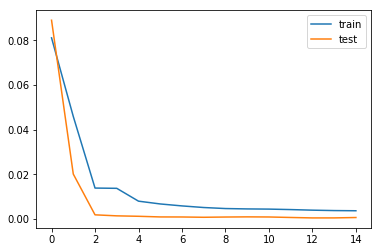

In [20]:
# plot history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [21]:
# Test the prediction of test data
y = model.predict(test_x)

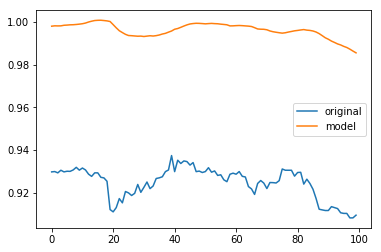

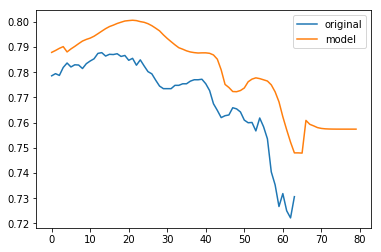

In [22]:
a = test_y[:,0]
b = y[:,0]
c = np.append(b, y[-1], axis=0)

# Show how the model fits the test data
pyplot.plot(a[:100], label='original')
pyplot.plot(b[:100], label='model')
pyplot.legend()
pyplot.show()

# Show how the model predicts data
pos = int(a.shape[0]-n_out*4)
pyplot.plot(a[pos:], label='original')
pyplot.plot(c[pos:], label='model')
pyplot.legend()
pyplot.show()


In [23]:
#Prediction on public data!
period = CONFIG['period']
import time
from urllib.request import urlopen
import json

# Download a live bitcoin price data set
def dl_X(now = None, points = n_lag, period = period, pair=CONFIG['pair']):
    if now == None:
        now = time.time() 
    end = now - now % period
    #print end, time.strftime("%a, %d %b %Y %H:%M:%S +0000", time.gmtime(end))
    start = end - points*period
    #print start, time.strftime("%a, %d %b %Y %H:%M:%S +0000", time.gmtime(start))
    url = "https://poloniex.com/public?command=returnChartData&currencyPair=%s&start=%d&end=%d&period=%d" % (pair, start, end, period)
    openUrl = urlopen(url)
    r = openUrl.read()
    openUrl.close()
    d = json.loads(r.decode())[-n_lag:]
    df = pd.DataFrame(d)
    original_columns=[u'close', u'date', u'high', u'low', u'open',u'volume']
    new_columns = ['Close','Timestamp','High','Low','Open','Volume']
    df = df.loc[:,original_columns]
    df.columns = new_columns
    
    return df

In [24]:
def predict(when=None):
    rt_df = dl_X(when)
    rt_values = rt_df.loc[:,columns].values
    rt_scaled = scaler.transform(rt_values)
    rt_x = rt_scaled.reshape((1, n_lag, n_features))
    print (rt_x.shape)
    return rt_scaled, model.predict(rt_x)

(1, 256, 4)


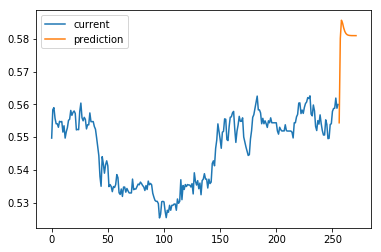

(1, 256, 4)


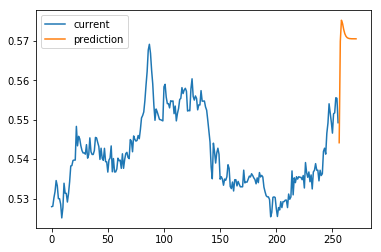

(1, 256, 4)


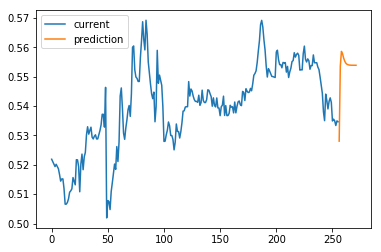

(1, 256, 4)


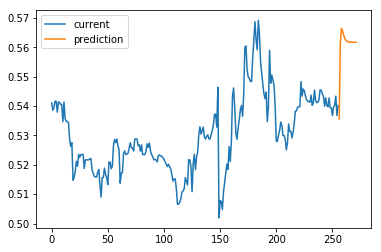

(1, 256, 4)


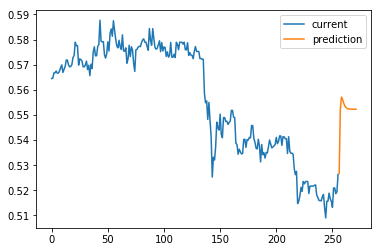

(1, 256, 4)


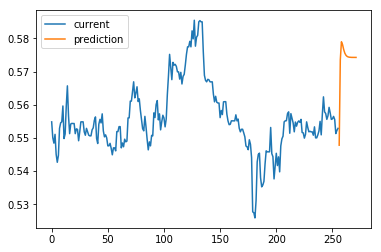

(1, 256, 4)


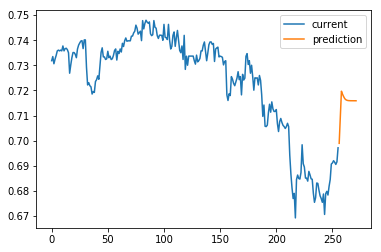

In [25]:
# do some now & past predictions
for t in [0, 100, 200, 300, 500, 1000, 2000]:
    rt_x, prediction = predict(time.time()-t*period)

    current = rt_x[:,0]
    prediction = prediction[0]

    pyplot.plot(current, label='current')

    # shift train predictions for plotting
    predictPlot = np.empty_like(current)
    predictPlot[:] = np.nan
    predictPlot = np.append(predictPlot, prediction)

    pyplot.plot(predictPlot, label='prediction')
    pyplot.legend()
    pyplot.show()

Sun, 01 Jul 2018 08:20:00 +0000
(1, 256, 4)


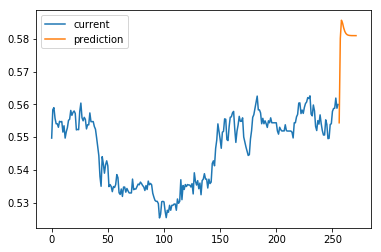

Sun, 01 Jul 2018 08:25:00 +0000
(1, 256, 4)


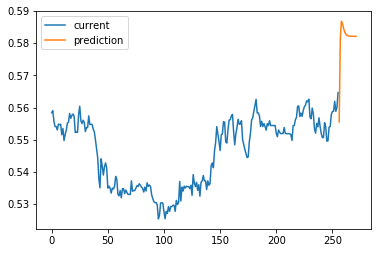

Sun, 01 Jul 2018 08:30:00 +0000
(1, 256, 4)


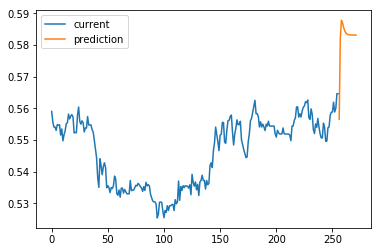

Sun, 01 Jul 2018 08:35:00 +0000
(1, 256, 4)


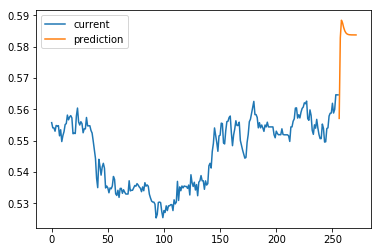

Sun, 01 Jul 2018 08:40:00 +0000
(1, 256, 4)


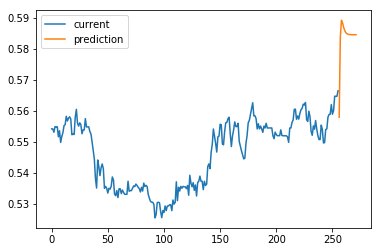

Sun, 01 Jul 2018 08:45:00 +0000
(1, 256, 4)


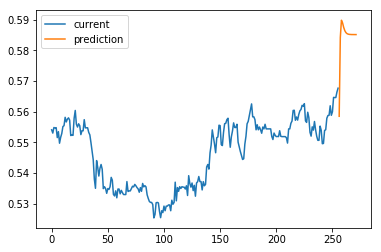

Sun, 01 Jul 2018 08:50:00 +0000
(1, 256, 4)


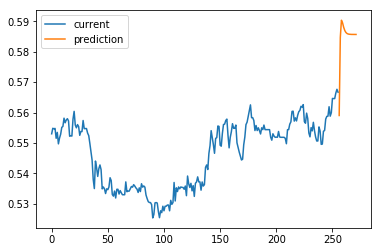

In [ ]:
#Prediction on live data!
starttime=time.time()
while True:
    now = time.time() 
    end = now - now % period
    print (time.strftime("%a, %d %b %Y %H:%M:%S +0000", time.gmtime(end)))
    rt_x, prediction = predict()

    current = rt_x[:,0]
    prediction = prediction[0]

    pyplot.plot(current, label='current')

    # shift train predictions for plotting
    predictPlot = np.empty_like(current)
    predictPlot[:] = np.nan
    predictPlot = np.append(predictPlot, prediction)

    pyplot.plot(predictPlot, label='prediction')
    pyplot.legend()
    pyplot.show()

    time.sleep(period - ((time.time() - starttime) % period))